# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter Exercise 4

### Training Dataset

The training dataset for this problem corresponds to the images of handwritten digits ‘0’ and ‘1’ that come
prepackaged with the sklearn package. There are a total of 360 images of digits ‘0’ and ‘1’; we will divide
them into 300 images for training purposes, while we will evaluate the performance of k-NN classification
on the remaining 60 images, which we will refer to as the “test” set.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d

# Obtaining training and test sets
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

### k-NN Classification Using 2-D Features

1. Carry out principal component analysis (PCA) of images in the training set and compute two-dimensional PCA features of training images.

In [2]:
# First transpose the image data and center
X = training_images.transpose()

mean = np.reshape(X.mean(1), (64,1))
X = X - mean

# X is now mean centered and ready for PCA
# Find SVS
# Get two dimensional features by first 2 columns of U
# Then multply by data to get the dimensional reduction

U, S, V = np.linalg.svd(X)
topTwo = U[:,[0,1]]
topTwoFeature = np.matmul(topTwo.transpose(), X)

- Display the two-dimensional features of training images as points on a two-dimensional scatter plot. Color all points corresponding to digits ‘0’ as red and all points corresponding to digits ‘1’ as green.

To display these features we need to use the training labels to extract their true value so that they can be plotted.

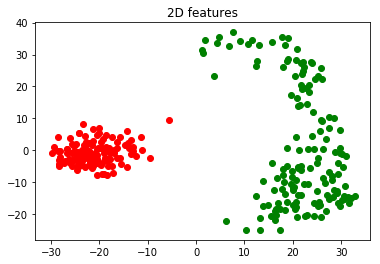

In [3]:
# Using the now 2D data, we can plot it using matplotlib
zeroData = []
oneData = []

for i in range(len(training_labels)):
    if(training_labels[i] == 1):
        oneData.append(topTwoFeature[:,i])
    else:
        zeroData.append(topTwoFeature[:,i])
    
# zip takes n number of iterables and returns list of tuples. 
# ith element of the tuple is created using the ith element from each of the iterables.
oneX, oneY = zip(*oneData)
zeroX, zeroY = zip(*zeroData)

fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(oneX,oneY, c='g');
ax.scatter(zeroX,zeroY, c='r');
plt.title("2D features");

2. Classify each image in the test set by first transforming it to the two-dimensional PCA domain using the principal components obtained above and then using $k-NN$ classification with $k = 5$ and the distance metric being $|| · ||_2$.

- Display the two-dimensional features of test images as points on a two-dimensional scatter plot. Color all points that are correctly classified as blue and all points that are incorrectly classified as black.

In [4]:
# We can use a heap to store the data with simple push and pop of the smallest values
from heapq import heappush, heappop

centeredTest = test_images.transpose() - mean
topTwoTest = np.matmul(topTwo.transpose(), centeredTest)

# For k-NN we need to find the distance between the test points and the training set points
kNNClassZero = []
kNNClassOne = []

k = 5
index = 0
for data in topTwoTest.transpose():
    heap = []
    # For each point we need to calculate the L2 norm.
    # Tuple is (L2Norm, class)
    for point in zeroData:
        # Make into python list
        np.reshape(point,(2,1))
        np.reshape(data,(2,1))
        # Push to heap, will maintain the ordering so that later the nearest are popped
        heappush(heap,(sum([x**2 for x in (data - point)])**0.5, 0))
    
    for point in oneData:
        np.reshape(point,(2,1))
        np.reshape(data,(2,1))
        heappush(heap,(sum([x**2 for x in (data - point)])**0.5, 1))
    
    # Now we need to pop from our heap and classify using kNN
    numOne = 0
    numZero = 0
    # We need the k nearest neighbors. The heap allows us to get the smallest distance off of the pop
    for i in range(k):
        pop = heappop(heap)
        if(pop[1] == 1):
            numOne += 1
        else:
            numZero += 1
    # Now add to the class lists
    if numOne > numZero:
        kNNClassOne.append((data, index))
    else:
        kNNClassZero.append((data, index))
        
    index += 1

At this point, each of the resulting data points is now classified as either a '0' or '1'. Although some may be classified incorrectly, and an error will have to be checked against their true values.

Incorrect values: []


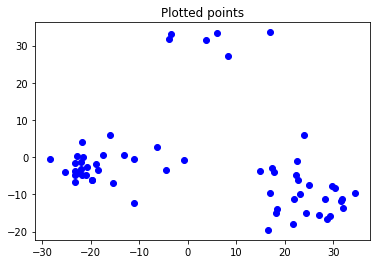

In [5]:
errors = []
clean =[]

for i in kNNClassOne:
    if 1 == test_labels[i[1]]:
        clean.append(i[0])
    else:
        errors.append(i[0])


for i in kNNClassZero:
    if 0 == test_labels[i[1]]:
        clean.append(i[0])
    else:
        errors.append(i[0])

cleanX, cleanY = zip(*clean)
# errorX, errorY = zip(*errors)

fig = plt.figure()
ax = fig.add_subplot(111);
ax.scatter(cleanX, cleanY, color='b');
# ax.scatter(errorX, errorY, color='r');
plt.title('Plotted points');

print ('Incorrect values: '  + str(errors))

3. Compute and display the average classification error for the test set, defined as $\frac{1}{N}\Sigma^N_{i=1}1_{y_i' != y_i}$
; here, $y_i$ denotes the true label of the $i-th$ image, $y'_i$ denotes the label returned by $k-NN$, and $N = 60$ in this
particular problem.

Notice how there are now values in the 'errors' list, indicating that all values were correctly classified. These misclassified values would be in red if they were plotted. The error would thus be zero, but for good measure, the steps of computation are shown below.

In [6]:
print('The classification error is: ' + str(len(errors)/(len(errors) + len(clean))))

The classification error is: 0.0


### k-NN Classification Using Higher-dimensional Features
1. Carry out PCA of images in the training set and compute r-dimensional PCA features of training images such that the top-r principal components capture 95% of variation within the training data.

We need to find the smallest k that will deliver the minimum desired variation of 95%.

In [7]:
# By taking the Frobenius norm, we get the square root of the sum of the squares of each entry in the matrix
frobNorm = np.linalg.norm(X, 'fro')
singularValues = 0
k = 0

# We must iterate over the singular values and find the amount of principal components that gives us the desired variance
# Remember python indexes from 0 so we need to add 1 to our k
for i in range(len(S)):
    singularValues += S[i]**2
    if(singularValues/(frobNorm**2) >= 0.95):
        k = i + 1
        break
print('The smallest k that gives variance of at least 0.95 is: k = ' + str(k))

The smallest k that gives variance of at least 0.95 is: k = 19


In [8]:
# So lets take r = 19
r = 19

# Get those features
topR = U.transpose()[0:r].transpose()
topRFeature = np.matmul(topR.transpose(), X)

zeroData = []
oneData = []

for i in range(len(training_labels)):
    if(training_labels[i] == 1):
        oneData.append(topRFeature[:,i])
    else:
        zeroData.append(topRFeature[:,i])
        
testR = np.matmul(topR.transpose(), centeredTest)
print (testR.shape)

(19, 60)


2. Classify each image in the test set by first transforming it to the r-dimensional PCA domain using the principal components obtained above and then using $k-NN$ classification with the distance metric being $|| · ||_2$ and $k$ being an odd integer from 1 to 9.

- Provide a labeled plot of the average classification error for the test set as a function of k.

We can compute the kNN just as before starting with the distances pushed onto a heap.

In [9]:
# We contain in a for loop that goes through the odd integers and iterates k

for k in range(1,10,2):
    # From here it is very similar as before for kNN
    index = 0
    kNNClassZero = []
    kNNClassOne = []
    
    for data in testR.transpose():
        heap = []
        # Tuple is (L2Norm, class)
        for point in zeroData:
            # Make into python list
            np.reshape(point, (r,1))
            np.reshape(data, (r,1))
            # Push to heap, will maintain the ordering so that later the nearest are popped
            heappush(heap,(sum([x**2 for x in (data - point)])**0.5, 0))

        for point in oneData:
            np.reshape(point,(r,1))
            np.reshape(data,(r,1))
            heappush(heap,(sum([x**2 for x in (data - point)])**0.5, 1))
            
        # Now we need to pop from our heap and classify using kNN
        numOne = 0
        numZero = 0
        for i in range(k):
            pop = heappop(heap)
            if(pop[1] == 1):
                numOne += 1
            else:
                numZero += 1
                
        # Now add to the class lists
        if numOne > numZero:
            kNNClassOne.append((data, index))
        else:
            kNNClassZero.append((data, index))
            
        index += 1

With the points classified we can check against the labels and see our error, just like before.

In [10]:
averageErrors = []
for k in range(1,10,2):
    errors = []
    clean =[]

    for i in kNNClassOne:
        if 1 == test_labels[i[1]]:
            clean.append(i[0])
        else:
            errors.append(i[0])


    for i in kNNClassZero:
        if 0 == test_labels[i[1]]:
            clean.append(i[0])
        else:
            errors.append(i[0])
        
    # We need a tuple to hold the value of k and the average error at that k
    averageErrors.append((k, len(errors)/(len(errors) + len(clean))))

From here we can now plot the average errors at each of the k values.

Text(0.5,1,'Average Classification Error for Test Set as a Function of k')

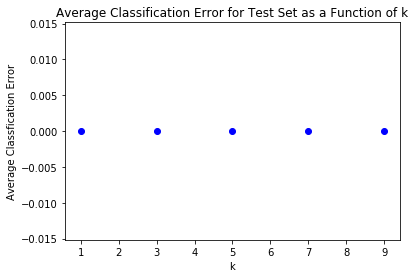

In [11]:
kList, errorList = zip(*averageErrors)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(kList, errorList,color='b')
plt.xlabel('k');
plt.ylabel('Average Classfication Error');
plt.title('Average Classification Error for Test Set as a Function of k')

- Based on the plot, what value of k will you recommend be used for future k-NN classification of digits ‘0’ and ‘1’?

Seeing as how there is no classification error, it would make much more sense to use a much smaller $k$. If $k$ were set to 1, then there would be less operations needed to reach this same conclusion. If for some reason this graph showed some error for a value of $k = 1$ then it would make sense to use a higher k value to eliminate the error. But in this instance, $k = 1$ gives no error and would work perfectly.